# Find Fine Wine
- How can you dine without some fine wine?

## Goal
* Discover drivers of wine quality
* Use drivers to develop clusters or groupings
* Use drivers and clusters to develop a machine learning model to predict wine quality

## Imports

In [1]:
# local imports
import wrangle as w
import explore as e
import modeling as m

### Acquire

- Data acquired from data.world
- Data initially acquired on 23 May 2023
- It contained 6497 rows and 13 columns before cleaning
- Each row represents a red or white variant of the Portuguese "Vinho Verde" wine
- Each column represents a physicochemical property of the wine
- Quality (target) is the median of at least 3 evaluations made by wine experts from 0 (very bad) to 10 (very excellent)

### Prepare

- Identify and handle Nulls
    - No Nulls
- Renamed columns for readability
- Verified data types
- Handle outliers
    - residual sugar < 33
    - free sulfur dioxide < 280
    - chlorides < 0.21
- Create custom features
- Encode categorical variables
- Split data into Train, Validate, Test (approx. 60/20/20)
- Scaled using Standard Scaler for clustering and modeling

In [2]:
# acquire, clean, and prepare the data
df = w.wrangle_wine()

# split into train, validate, and test
train, validate, test = w.split_data(df)

#### A brief look at the data

In [3]:
# taking a peek
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol,quality,red
4327,6.5,0.35,0.28,12.40,0.051,86.0,213.0,0.9962,3.16,0.51,9.9,6,0
3599,6.8,0.31,0.09,1.40,0.040,56.0,145.0,0.9922,3.19,0.46,10.0,5,0
3081,6.7,0.16,0.49,2.40,0.046,57.0,187.0,0.9952,3.62,0.81,10.4,6,0
1945,5.6,0.34,0.10,1.30,0.031,20.0,68.0,0.9906,3.36,0.51,11.2,7,0
3648,6.3,0.28,0.24,8.45,0.031,32.0,172.0,0.9958,3.39,0.57,9.7,7,0


#### Quality Distribution

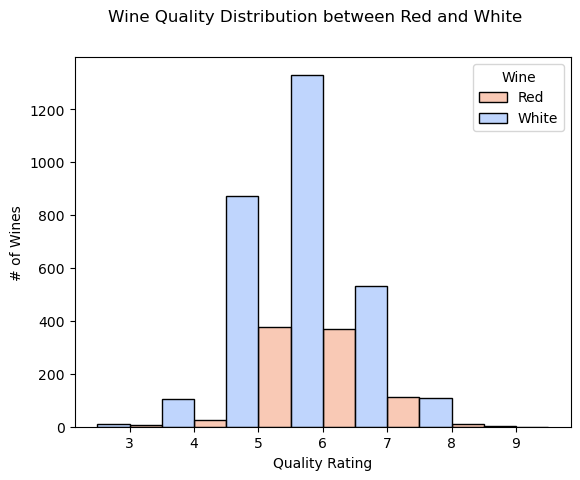

In [4]:
# target distribution
e.dist(train)

## Explore
- Is there a correlation between wine type (red and white) and quality?
- Is there a correlation between 

### Is there a correlation between ??? and quality?
* $H_0$: There is **NO** correlation between wine type and quality
* $H_a$: There is a correlation between wine type and quality
* Continuous (???) vs Continuous (quality) = $Spearman's R$
    - $r$ = 
    - $p$ = 
* wine type is correlated with `quality`

In [5]:
# explore ??? and quality


**With an alpha of 0.05 (confidence 95%) the p-value is ??? than alpha. Therefore, evidence suggests that ??? and quality are correlated with each other. I believe that using `???` in the modeling could have a positive impact.**

### Is there a correlation between ??? and quality?
* $H_0$: There is **NO** correlation between ??? and quality
* $H_a$: There is a correlation between ??? and quality
* Continuous (???) vs Continuous (quality) = $Spearman's R$
    - $r$ = 
    - $p$ = 
* `???` is correlated with `quality`

In [ ]:
# explore ??? and quality


**With an alpha of 0.05 (confidence 95%) the p-value is ??? than alpha. Therefore, evidence suggests that ??? and quality are correlated with each other. I believe that using `???` in the modeling could have a positive impact.**

### Is there a correlation between ??? and quality?
* $H_0$: There is **NO** correlation between ??? and quality
* $H_a$: There is a correlation between ??? and quality
* Continuous (???) vs Continuous (quality) = $Spearman's R$
    - $r$ = 
    - $p$ = 
* `???` is correlated with `quality`

In [ ]:
# explore ??? and quality


**With an alpha of 0.05 (confidence 95%) the p-value is ??? than alpha. Therefore, evidence suggests that ??? and quality are correlated with each other. I believe that using `???` in the modeling could have a positive impact.**

### Is there a correlation between ??? and quality?
* $H_0$: There is **NO** correlation between ??? and quality
* $H_a$: There is a correlation between ??? and quality
* Continuous (???) vs Continuous (quality) = $Spearman's R$
    - $r$ = 
    - $p$ = 
* `???` is correlated with `quality`

In [ ]:
# explore ??? and quality


**With an alpha of 0.05 (confidence 95%) the p-value is ??? than alpha. Therefore, evidence suggests that ??? and quality are correlated with each other. I believe that using `???` in the modeling could have a positive impact.**

## Exploration Summary 
- ???

### Features for Modeling
- Features that will be used:
    - quality (target)
- Some features that may be useful:
    - fixed_acidity
    - volatile_acidity
    - chlorides
    - free_so2
    - total_so2
    - alcohol

## Modeling
- RMSE will be the evaluation metric
- Target is quality
- Using mean of the quality as baseline
    - Red baseline: 5.66
    - White baseline: 5.88
- Features scaled using Standard Scaler
- Models will be developed using a few different types, various features, and various hyperparameter configurations
    - different models for red and white wines
    - Linear Regression
    - Polynomial Features through Linear Regression
    - Polynomial Features with a KMeans Cluster
    - Lasso Lars was worse than baseline so left behind
    - Tweedie Regressor (GLM)
- Models will be evaluated on Train and Validate
- Best performing model will only be evaluated on Test

In [7]:
# get baseline
m.baseline(train,validate)

Baseline:   Red:  5.66  White: 5.88
Train       RMSE: 0.88  RMSE:  0.88
Validate    RMSE: 0.87  RMSE:  0.87


In [6]:
# split into X and y, red and white
Xr_train, Xr_val, Xr_test = train[train.red==1].drop(columns=['quality']),validate[validate.red==1].drop(columns=['quality']),test[test.red==1].drop(columns=['quality'])
Xw_train, Xw_val, Xw_test = train[train.red==0].drop(columns=['quality']),validate[validate.red==0].drop(columns=['quality']),test[test.red==0].drop(columns=['quality'])
yr_train, yr_val, yr_test = train[train.red==1][['quality']],validate[validate.red==1][['quality']],test[test.red==1][['quality']]
yw_train, yw_val, yw_test = train[train.red==0][['quality']],validate[validate.red==0][['quality']],test[test.red==0][['quality']]

# standard scaler
Xrs_train,Xrs_val,Xrs_test = w.std(Xr_train,Xr_val,Xr_test)
Xws_train,Xws_val,Xws_test = w.std(Xw_train,Xw_val,Xw_test)

### Best 4 Model Configurations

#### Linear Regression

In [ ]:
# linear regression results
m.final_models('lr',Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

#### Polynomial Features

In [ ]:
# polynomial features results
m.final_models('poly',Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

#### Polynomial Features with a KMeans Cluster

In [ ]:
# poly cluster results
# m.cluster_model(Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

#### Tweedie Regressor

In [ ]:
# tweedie results
m.final_models('tweedie',Xrs_train,Xws_train,yr_train,yw_train,Xrs_val,Xws_val,yr_val,yw_val)

### Best to Test
- Polynomial Features for white wine

In [ ]:
# best model eval with test data
m.test_model(Xrs_train,Xws_train,yr_train,yw_train,Xrs_test,Xws_test,yr_test,yw_test)

#### How does it compare?

In [ ]:
# plot predictions vs actual on test
m.plt_err(Xrs_train,Xws_train,yr_train,yw_train,Xrs_test,Xws_test,yr_test,yw_test)

### Modeling Wrap Up
- ???

## Conclusion

### Takeaways and Key Findings
- ???

### Recommendations and Next Steps
- ???
- Just go to the store and get some $10 wine since it will probably taste just fine